# Step 1 — Load & Inspect Dataset (Simple)

**Goal:** Load the CSV and quickly understand the data.
We will:
- Import libraries
- Load the file from `data/train.csv`
- Check shape, head, info
- Check missing values
- (If exists) peek at `Loan_Status`


In [38]:
import pandas as pd

df = pd.read_csv("../data/train.csv")
print("Loaded. Shape:", df.shape)
df.head()


Loaded. Shape: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [40]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
df.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [42]:
df.shape

(614, 13)

In [43]:

if "Loan_Status" in df.columns:
    print(df["Loan_Status"].value_counts(dropna=False))
else:
    print("Column 'Loan_Status' not found. Columns are:", list(df.columns))


Y    422
N    192
Name: Loan_Status, dtype: int64


# Step 2 — Data Cleaning (Simple)

**Goal:**  
- Fill missing values.  
- Fix any wrong data types.

**Approach:**  
- Categorical columns → fill missing with most frequent value (mode).  
- Numerical columns → fill missing with median.


In [44]:
import numpy as np

# Separate column types
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Fill missing categorical with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill missing numeric with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

print("Missing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [45]:

for col in cat_cols:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass  # keep as object if not convertible

print(df.dtypes)



Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


# Step 3 — Exploratory Data Analysis (EDA)

**Goal:**  
- Visualize categorical and numerical features.  
- Identify patterns and relationships in the data.

**Approach:**  
- Countplots for categorical columns.  
- Histograms for numerical columns.  
- Correlation heatmap for numeric features.



In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")


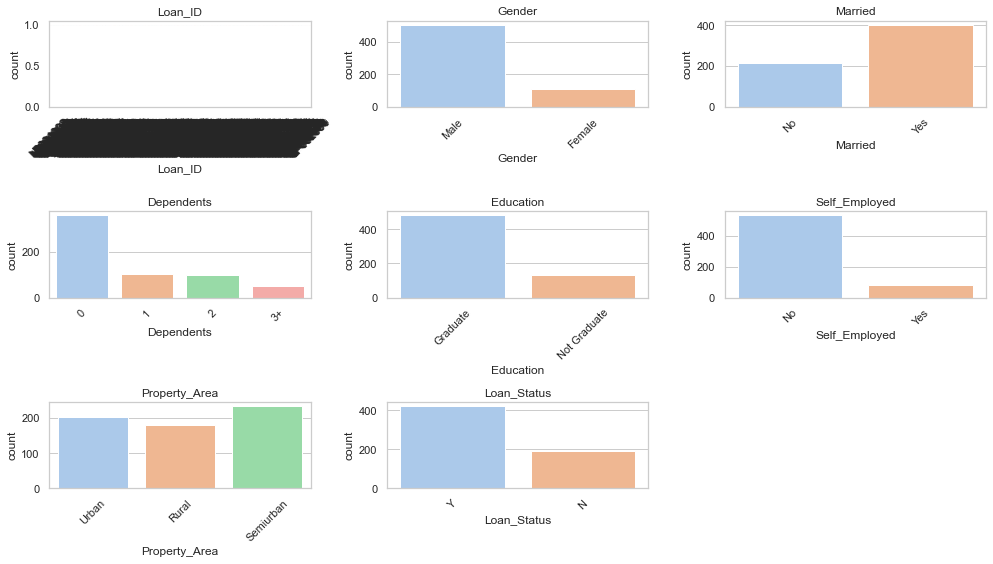

In [47]:
# Countplots for categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(14, 8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot((len(cat_cols) // 3) + 1, 3, i)
    sns.countplot(x=col, data=df, palette="pastel")
    plt.xticks(rotation=45)
    plt.title(col)
plt.tight_layout()
plt.show()


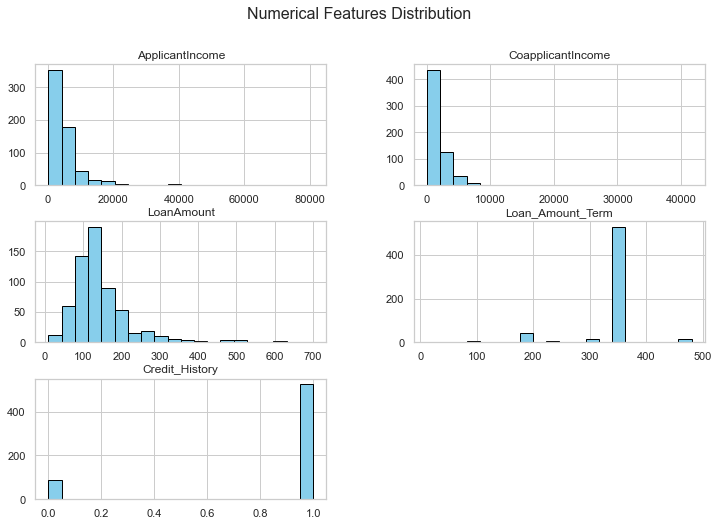

In [48]:
# Histograms for numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

df[num_cols].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Numerical Features Distribution", fontsize=16)
plt.show()


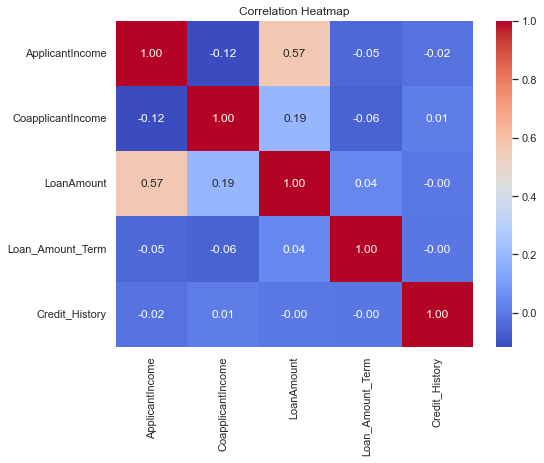

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Step 4 — Encoding Categorical Variables

**Goal:**  
Convert categorical (string) features into numerical format so that machine learning models can use them.

**Approach:**  
- Use `LabelEncoder` for binary columns (2 unique values).  
- Use `pd.get_dummies()` (One-Hot Encoding) for multi-category columns.


In [50]:
import pandas as pd

df_fixed = df.copy()

# Target to 0/1
if "Loan_Status" in df_fixed.columns:
    df_fixed["Loan_Status"] = df_fixed["Loan_Status"].map({"Y": 1, "N": 0}).astype(int)

# Drop ID columns if present
for col in list(df_fixed.columns):
    if col.lower() in {"loan_id"} or col.lower().startswith("loan_id"):
        df_fixed.drop(columns=[col], inplace=True)

# Binary maps (0/1)
bin_maps = {
    "Gender": {"Male": 1, "Female": 0},
    "Married": {"Yes": 1, "No": 0},
    "Education": {"Graduate": 1, "Not Graduate": 0},
    "Self_Employed": {"Yes": 1, "No": 0},
}
for c, m in bin_maps.items():
    if c in df_fixed.columns:
        df_fixed[c] = df_fixed[c].map(m)

# Dependents: "3+" -> 3 (int)
if "Dependents" in df_fixed.columns:
    df_fixed["Dependents"] = df_fixed["Dependents"].replace("3+", "3").astype(int)

# One-hot encode ONLY Property_Area
if "Property_Area" in df_fixed.columns:
    df_fixed = pd.get_dummies(df_fixed, columns=["Property_Area"], drop_first=True)

# Split X, y
X = df_fixed.drop("Loan_Status", axis=1)
y = df_fixed["Loan_Status"]

print("X columns:", list(X.columns))
X.head()


X columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area_Semiurban', 'Property_Area_Urban']


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1


# Step 5 — Scale Numerical Features (simple)

We scale only the continuous numeric features used by the models:
`ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Dependents`.

This keeps binary/one‑hot features (e.g., Gender, Married, Property_Area_*) untouched.


In [51]:
from sklearn.preprocessing import StandardScaler

continuous_candidates = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Dependents"]
num_cols = [c for c in continuous_candidates if c in X.columns]

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

print("Scaled columns:", num_cols)


Scaled columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Dependents']


In [52]:
from sklearn.preprocessing import StandardScaler

# X, y must already exist from Step 4
scaler = StandardScaler()

# continuous numeric columns to scale (only those that actually exist in X)
continuous_candidates = [
    "ApplicantIncome",
    "CoapplicantIncome",
    "LoanAmount",
    "Loan_Amount_Term",
    "Dependents",
]
num_cols = [c for c in continuous_candidates if c in X.columns]

# fit scaler and transform these columns
X[num_cols] = scaler.fit_transform(X[num_cols])

print("Scaled columns:", num_cols)
X.head()


Scaled columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Dependents']


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban
0,1,0,-0.737806,1,0,0.072991,-0.554487,-0.211241,0.273231,1.0,0,1
1,1,1,0.253470,1,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,0
2,1,1,-0.737806,1,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,0,1
3,1,1,-0.737806,0,0,-0.462062,0.251980,-0.306435,0.273231,1.0,0,1
4,1,0,-0.737806,1,0,0.097728,-0.554487,-0.056551,0.273231,1.0,0,1


In [53]:
from sklearn.model_selection import train_test_split

# X, y already defined in Step 4; X has encoding, Step 5 scaled num_cols
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((491, 12), (123, 12))

# Step 7 — Train Models

**Goal:**  
Train at least two classification models and compare their performance.

**Models:**  
- Logistic Regression  
- Random Forest Classifier


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

log_reg = LogisticRegression(max_iter=1000, n_jobs=None)
log_reg.fit(X_train, y_train)

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

print("✅ Trained LogisticRegression and RandomForest")


✅ Trained LogisticRegression and RandomForest


# Step 8 — Model Evaluation

**Goal:**  
Evaluate both models using:
- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix
- ROC-AUC score



=== Logistic Regression ===
Accuracy : 0.8617886178861789
Precision: 0.84
Recall   : 0.9882352941176471
F1-score : 0.9081081081081082
ROC-AUC  : 0.7835913312693499

Report:
               precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



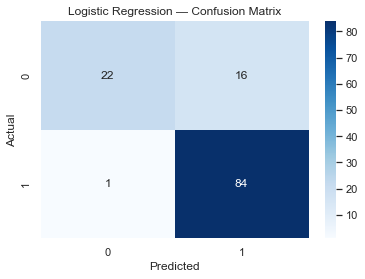


=== Random Forest ===
Accuracy : 0.8211382113821138
Precision: 0.8387096774193549
Recall   : 0.9176470588235294
F1-score : 0.8764044943820225
ROC-AUC  : 0.7614551083591331

Report:
               precision    recall  f1-score   support

           0       0.77      0.61      0.68        38
           1       0.84      0.92      0.88        85

    accuracy                           0.82       123
   macro avg       0.80      0.76      0.78       123
weighted avg       0.82      0.82      0.81       123



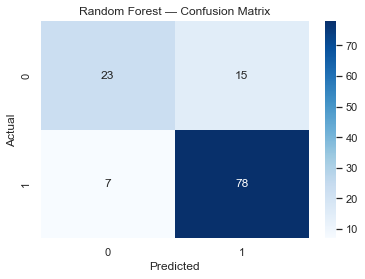

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def eval_model(model, name):
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-score :", f1_score(y_test, y_pred))
    print("ROC-AUC  :", roc_auc_score(y_test, y_pred))
    print("\nReport:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} — Confusion Matrix")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.show()

eval_model(log_reg, "Logistic Regression")
eval_model(rf_clf, "Random Forest")


# Step 9 — Hyperparameter Tuning

**Goal:**  
Find the best hyperparameters for our chosen model to improve performance.

**Approach:**  
- Use `GridSearchCV` on the better-performing model (Random Forest in most cases).  
- Try different combinations of parameters.


Best params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}

=== Random Forest (Tuned) ===
Accuracy : 0.8536585365853658
Precision: 0.8316831683168316
Recall   : 0.9882352941176471
F1-score : 0.903225806451613
ROC-AUC  : 0.7704334365325077

Report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



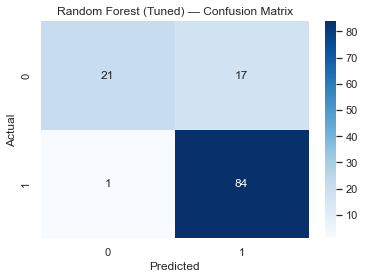

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
best_model = grid.best_estimator_
eval_model(best_model, "Random Forest (Tuned)")


# Step 10 — Save the Best Model

**Goal:**  
Persist the trained artifacts so we can load them in the Streamlit app.

**We will save:**
- The best classifier (`best_model` from GridSearchCV; fallback to RandomForest).
- The fitted scaler (for numeric columns).
- The feature column order after encoding (to align inputs at inference time).


In [57]:
import os, joblib

MODELS_DIR = os.path.join("..", "models")
os.makedirs(MODELS_DIR, exist_ok=True)

joblib.dump(best_model,              os.path.join(MODELS_DIR, "loan_rf_model.joblib"))
joblib.dump(scaler,                  os.path.join(MODELS_DIR, "scaler.joblib"))
joblib.dump(list(X.columns),         os.path.join(MODELS_DIR, "feature_columns.joblib"))
joblib.dump(num_cols,                os.path.join(MODELS_DIR, "num_cols.joblib"))

print("Saved:")
print(os.path.join(MODELS_DIR, "loan_rf_model.joblib"))
print(os.path.join(MODELS_DIR, "scaler.joblib"))
print(os.path.join(MODELS_DIR, "feature_columns.joblib"))
print(os.path.join(MODELS_DIR, "num_cols.joblib"))


Saved:
..\models\loan_rf_model.joblib
..\models\scaler.joblib
..\models\feature_columns.joblib
..\models\num_cols.joblib


In [58]:
import sklearn, sys; print("Train sklearn:", sklearn.__version__)


Train sklearn: 1.2.2
